# Project #2 - STAT 517

## Question-0 : Predicting Job Salary

A project for Data Mining at the University of Southampton. The aim is to predict a job's salary with statistical learning, based on information within a job advert.

The main dataset consists of roughly 250k rows representing individual job ads, and a set of variables descriptions about each job ad. A simplified data of 10k could be retrieved at

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
%matplotlib inline
import seaborn as sns

salary = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")
salary

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,25000,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,75000,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,22000,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,23000,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,85000,cv-library.co.uk


The variables are described as follows:

Id - A unique identifier for each job ad

Title - A freetext field supplied to us by the job advertiser as the Title of the job ad. Normally this is a summary of the job title or role.

FullDescription - The full text of the job ad as provided by the job advertiser.

LocationRaw - The freetext location as provided by the job advertiser.

LocationNormalized - Adzuna's normalised location from within our own location tree, interpreted by us based on the raw location. Our normaliser is not perfect!

ContractType - full_time or part_time, interpreted by Adzuna from description or a specific additional field we received from the advertiser.

ContractTime - permanent or contract, interpreted by Adzuna from description or a specific additional field we received from the advertiser.

Company - the name of the employer as supplied to us by the job advertiser.

Category - which of 30 standard job categories this ad fits into, inferred in a very messy way based on the source the ad came from. We know there is a lot of noise and error in this field.

SalaryRaw - the freetext salary field we received in the job advert from the advertiser.

SalaryNormalised - the annualised salary interpreted by Adzuna from the raw salary. Note that this is always a single value based on the midpoint of any range found in the raw salary. This is the value we are trying to predict.

SourceName - the name of the website or advertiser from whom we received the job advert.

Present useful graphics to understand and/or reveal sensible info about the data set. Develop feasible models and compare their predictive accuracies and performance as a whole. Discuss the pros and cons of these models. Summarize and critique your modeling and findings.

## Solution:

### Dataset information:

In [161]:
print (salary.shape) # prints the dimensions of the dataset
print (salary.columns) # prints the column names 
print (salary.isnull().sum()) # prints the sum of null values in each column

(10000, 12)
Index([u'Id', u'Title', u'FullDescription', u'LocationRaw',
       u'LocationNormalized', u'ContractType', u'ContractTime', u'Company',
       u'Category', u'SalaryRaw', u'SalaryNormalized', u'SourceName'],
      dtype='object')
Id                       0
Title                    1
FullDescription          0
LocationRaw              0
LocationNormalized       0
ContractType          6444
ContractTime          5263
Company               4049
Category                 0
SalaryRaw                0
SalaryNormalized         0
SourceName               0
dtype: int64


*We can see that the attributes Title, ContractType, ContractTime, and Company has missing values

### Managing null values in the dataset:

In [162]:
print (salary.Title.value_counts()) 
print (salary.ContractType.value_counts()) 
print (salary.ContractTime.value_counts())
print (salary.Company.value_counts())

Staff Nurse                                                           78
Home Manager                                                          61
Dental Nurse                                                          39
Deputy Manager                                                        32
Project Manager                                                       24
RGN Nurse                                                             23
Business Development Manager                                          19
Registered Nurse                                                      18
Nursing Home Manager                                                  17
Sales Executive                                                       16
Mechanical Design Engineer                                            16
Web Developer                                                         15
Deputy Home Manager                                                   15
Telesales Executive                                

 *We can see the most frequently occuring data for the selected attributes. 
 
 They are:
 
 Title: Staff Nurse
 
 ContractType: full_time
 
 ContractTime: permanent
 
 Company: JOBG8
 
 The missing values in each attribute is replaced by the most frequently occuring value in that attribute

In [163]:
# Replacing missing values
salary.Title.fillna(value = 'Staff Nurse', inplace=True)
salary.ContractType.fillna(value = 'full_time', inplace=True)
salary.ContractTime.fillna(value = 'permanent', inplace=True)
salary.Company.fillna(value = 'JOBG8', inplace=True)

In [164]:
print (salary.isnull().sum()) # Checking for null values

Id                    0
Title                 0
FullDescription       0
LocationRaw           0
LocationNormalized    0
ContractType          0
ContractTime          0
Company               0
Category              0
SalaryRaw             0
SalaryNormalized      0
SourceName            0
dtype: int64


### Preliminary results:

Text(0,0.5,u'SalaryNormalized')

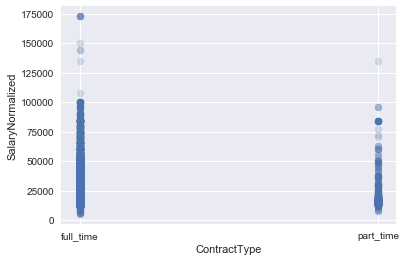

In [165]:
plt.scatter(salary.ContractType, salary.SalaryNormalized, alpha=0.2)
plt.xlabel('ContractType')
plt.ylabel('SalaryNormalized')

Text(0,0.5,u'SalaryNormalized')

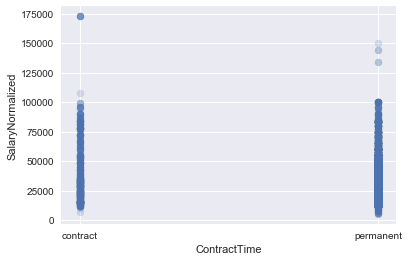

In [166]:
plt.scatter(salary.ContractTime, salary.SalaryNormalized, alpha=0.2)
plt.xlabel('ContractTime')
plt.ylabel('SalaryNormalized')

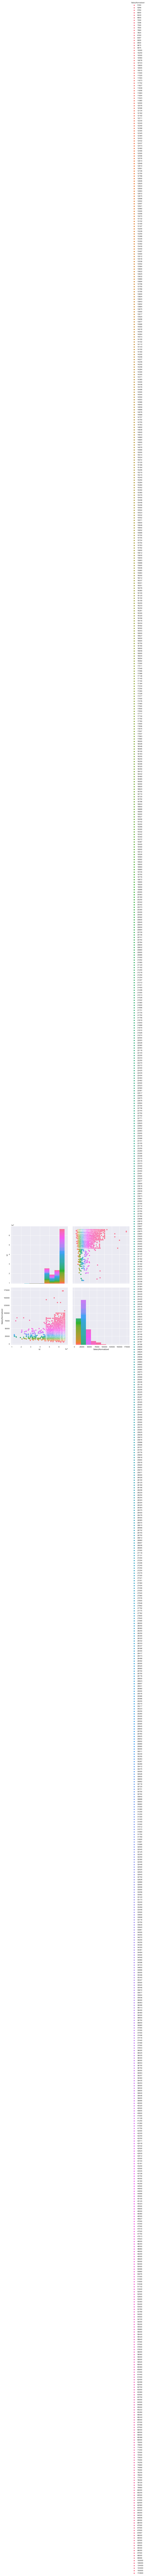

In [14]:
sns.set()
sns.pairplot(salary, hue = 'SalaryNormalized', size = 5)

### Preprocessing

Getting dummy variables for categorical values

In [167]:
salary.shape

(10000, 12)

In [168]:
salary = pd.get_dummies(salary, columns=["Title", "FullDescription", "LocationRaw", "LocationNormalized", "ContractType", "ContractTime", "Company", "Category", "SalaryRaw", "SourceName"])
print (salary.shape)
salary.head()

(10000, 28596)


,Id,SalaryNormalized,Title_ CHEF DE PARTIE **** RED STAR **** ROSETTE KITCHEN **** to ****,Title_ CHEF DE PARTIE **** ROSETTE **** STAR HOTEL LARGE ESTATE ****,Title_ CHEF DE PARTIE DORKING **** ROSETTE **** STAR QUALITY GROUP,Title_ COMMIS CHEF **** ROSETTE WELL KNOWN COUNTRY ESTATE ****,Title_ JUNIOR SOUS **** ROSETTE **** STAR HOTEL DORKING ****,Title_ JUNIOR SOUS CHEF **** RED STAR **** ROSETTE KITCHEN HIGH STANDARDS,Title_ JUNIOR SOUS CHEF **** STAR HOTEL SEAS SIDE LOCATION ****,Title_ SOUS CHEF **** ROSETTE WINDSOR QUALITY GROUP ****,...,SourceName_technojobs.co.uk,SourceName_thecareerengineer.com,SourceName_thegraduate.co.uk,SourceName_theitjobboard.co.uk,SourceName_theladders.co.uk,SourceName_totaljobs.com,SourceName_uksport.gov.uk,SourceName_wileyjobnetwork.com,SourceName_workthing.com,SourceName_zartis.com
0,12612628,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12612830,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12612844,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12613049,27500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12613647,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataset partitioning into training and test datasets:

In [169]:
y = pd.DataFrame([salary.SalaryNormalized]).T # Separating the response variable
x = pd.DataFrame(salary)
x = salary.drop(['SalaryNormalized'], axis = 1)
print (x.shape)
print (y.shape)

(10000, 28595)
(10000, 1)


In [170]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 7, test_size = 0.25)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(7500, 28595)
(2500, 28595)
(7500, 1)
(2500, 1)


### Importing necessary packages for analysis

In [172]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Multiple Linear Regression:

In [175]:
mlr_sal = linear_model.LinearRegression()
mlr_model = mlr_sal.fit(xtrain,ytrain)
mlr_predictions = mlr_sal.predict(xtest)
print(mlr_predictions)[0:5]

[[24935.05295181]
 [18394.83649945]
 [29092.16686399]
 [26735.876741  ]
 [41215.35673448]
 [28457.99151653]
 [22255.87428109]
 [40893.7449332 ]
 [28454.80434552]
 [28662.95441008]]


In [177]:
print (ytest[:5])
print (mlr_predictions[:5])
#Displaying first five predicted values for y based on x-test and corresponding ytest values

      SalaryNormalized
9953             12437
3850             14208
4962             32000
3886             24500
5437             37500
[[24935.05295181]
 [18394.83649945]
 [29092.16686399]
 [26735.876741  ]
 [41215.35673448]]


In [178]:
print (mlr_sal.coef_)
print (mlr_sal.intercept_)
#Displays intercepts and coefficients of the regression equation

[[ 3.34782196e-05 -8.41914118e+02  7.30366843e+01 ...  5.43013896e+02
  -4.37128051e+03  4.18208839e+02]]
[28094.71208469]


### Mean squared error score

In [179]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, mlr_predictions))

Mean squared error: 109198513.70


### Variance score

In [180]:
print('Variance score: %.2f' % r2_score(ytest, mlr_predictions))

Variance score: 0.58


### Accuracy

In [181]:
accuracy_mlr1 = mlr_sal.score(xtrain, ytrain) * 100
accuracy_mlr2 = mlr_sal.score(xtest, ytest) * 100
print("Training set score: {:.2f}".format(mlr_sal.score(xtrain, ytrain) * 100, 2))
print("Test set score: {:.2f}".format(mlr_sal.score(xtest, ytest) * 100, 2))

Training set score: 100.00
Test set score: 58.30


## Lasso Regression

In [182]:
from sklearn.linear_model import Lasso
lasso_sal = Lasso().fit(xtrain, ytrain)
accuracy_l1 = lasso_sal.score(xtrain, ytrain) * 100
accuracy_l2 = lasso_sal.score(xtest, ytest) * 100

Training set score: 92.90
Test set score: 55.68
Number of features used: 5391


### Accuracy

In [183]:
print("Training set score: {:.2f}".format(lasso_sal.score(xtrain, ytrain) * 100, 2))
print("Test set score: {:.2f}".format(lasso_sal.score(xtest, ytest) * 100, 2))
print("Number of features used: {}".format(np.sum(lasso_sal.coef_ != 0)))

Training set score: 92.90
Test set score: 55.68
Number of features used: 5391


## Ridge Regression

In [184]:
from sklearn.linear_model import Ridge
ridge_sal = Ridge().fit(xtrain, ytrain)
accuracy_r1 = ridge_sal.score(xtrain, ytrain) * 100
accuracy_r2 = ridge_sal.score(xtest, ytest) * 100

C:\Users\fadhi\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Training set score: 23.06
Test set score: 21.90


### Accuracy

In [185]:
print("Training set score: {:.2f}".format(ridge_sal.score(xtrain, ytrain) * 100, 2))
print("Test set score: {:.2f}".format(ridge_sal.score(xtest, ytest) * 100, 2))

Training set score: 23.06
Test set score: 21.90


## Results

In [186]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'Training Score': [accuracy_mlr1, accuracy_l1, accuracy_r1],
    'Testing Score': [accuracy_mlr2, accuracy_l2, accuracy_r2],})
results

,Model,Testing Score,Training Score
0,Linear Regression,58.300538,100.000000
1,Lasso Regression,55.683209,92.902098
2,Ridge Regression,21.900080,23.064350


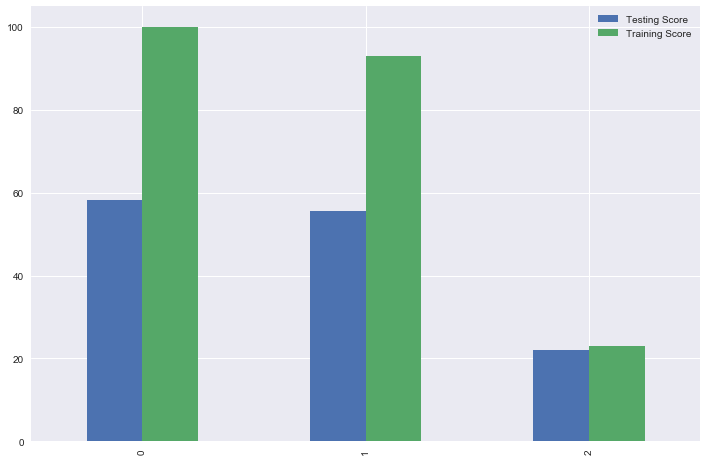

In [187]:
results.plot(kind = 'bar', figsize = (12, 8))

## Discussion:

Useful graphics about the dataset was presented. It revealed helpful information about the target and non-target attributes, giving us a better understanding about the dataset. The dataset was preprocessed, analysed, and 3 models were generated for this project. The chosen models were Multiple Linear Regression, Lasso Regression, and Ridge Regression models. From the results, we can see that Multiple Linear Regression generated the model with the best accuracy, with the training and testing datasets.